In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt

# 1. Data

In [61]:
# 1. data import
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

print("훈련 데이터 shape : {} / 훈련 데이터 Label Size: {}".format(train_images.shape, train_labels.size))
print("테스트 데이터 shape : {} / 테스트 데이터 Label Size: {}".format(test_images.shape, test_labels.size))

train_images[0][0]

훈련 데이터 shape : (60000, 28, 28) / 훈련 데이터 Label Size: 60000
테스트 데이터 shape : (10000, 28, 28) / 테스트 데이터 Label Size: 10000


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

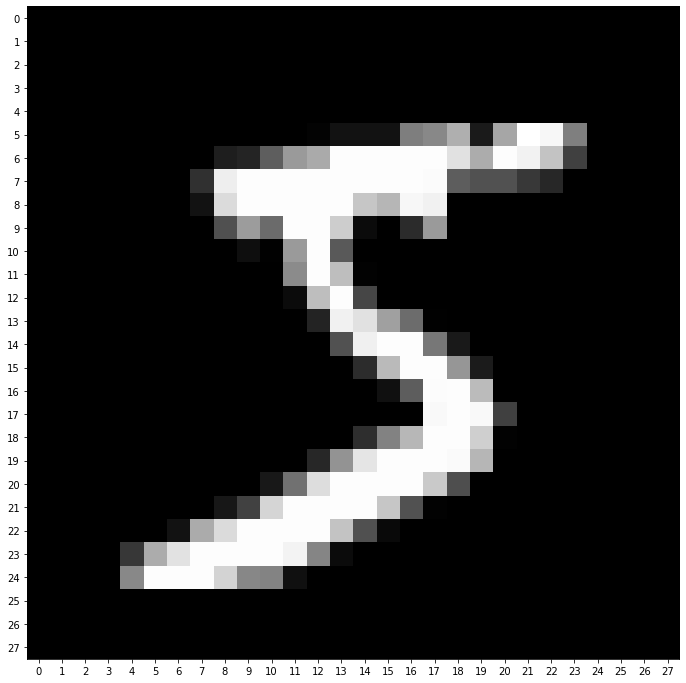

In [62]:
# 2. Visualization
img = train_images[0]

plt.figure(figsize=(12,12))

plt.imshow(img, 'gray')
plt.xticks(range(28))
plt.yticks(range(28))
plt.show()

- MNIST의 제일 상위 데이터는 각 각의 숫자 이미지를 말하고, 숫자 이미지는 (28, 28) 공간으로 표현되어 진다.

In [63]:
# 3. Reshape
# 현재 MNIST 이미지는 GrayScale의 형태의 데이터로 입력되어 있다.
# 즉, 이미지 포맷을 (28, 28, 1)의 형태로 나타내어 합성곱층으로 전달해주어야 한다.
# 합성곱층에서의 입력데이터는 (H,W,C)의 형태로 나타내기 때문이다.
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))

print("훈련 데이터 shape : {} / 훈련 데이터 Label Size: {}".format(train_images.shape, train_labels.size))
print("테스트 데이터 shape : {} / 테스트 데이터 Label Size: {}".format(test_images.shape, test_labels.size))

train_images[0][0]

훈련 데이터 shape : (60000, 28, 28, 1) / 훈련 데이터 Label Size: 60000
테스트 데이터 shape : (10000, 28, 28, 1) / 테스트 데이터 Label Size: 10000


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]], dtype=uint8)

In [64]:
# 4. Normalization
# 단순히 0과 1사이의 값으로 만들기 위한 작업이다.
train_images, test_images = train_images / 255.0, test_images / 255.0

train_images[0].mean()

0.13768007202881152

# 2. Convolution Neural Network

In [73]:
# 1. Convolution Layer
conv_layer = layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))

output = conv_layer(train_images)

In [84]:
print(train_images.shape)
print(output.shape)

(60000, 28, 28, 1)
(60000, 26, 26, 32)


In [86]:
# 2. Pooling Layer
pooling_layer = layers.MaxPooling2D(2,2)

output_2 = pooling_layer(output)

In [87]:
print(output.shape)
print(output_2.shape)

(60000, 26, 26, 32)
(60000, 13, 13, 32)


In [95]:
# 3. model example
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
Total params: 55,744
Trainable params: 55,744
Non-trai

In [96]:
# 4. Dense Layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

In [97]:
# 5. model complie
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1495 - accuracy: 0.9555
Epoch 2/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0481 - accuracy: 0.9852
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0262 - accuracy: 0.9917
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0213 - accuracy: 0.9930


In [98]:
# 6. Evaluate
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

313/313 - 4s - loss: 0.0315 - accuracy: 0.9906 - 4s/epoch - 12ms/step
0.9905999898910522
